<a href="https://colab.research.google.com/github/MickaRiv/ProjetDatascientest-VoiceSeparator/blob/Ephi/notebooks/separation_de_voix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install nussl et import systématiques

## Install de nussl

In [1]:
# à ne faire qu'une fois pour installer le paquet nussl
!pip install nussl

     |████████████████████████████████| 239 kB 7.4 MB/s 
     |████████████████████████████████| 503 kB 49.0 MB/s 
     |████████████████████████████████| 232 kB 51.7 MB/s 
     |████████████████████████████████| 146 kB 37.2 MB/s 
     |████████████████████████████████| 3.3 MB 48.5 MB/s 
     |████████████████████████████████| 51 kB 58 kB/s 
     |████████████████████████████████| 69 kB 5.4 MB/s 
     |████████████████████████████████| 87 kB 5.6 MB/s 
     |████████████████████████████████| 963 kB 42.8 MB/s 
     |████████████████████████████████| 129 kB 39.9 MB/s 
     |████████████████████████████████| 6.2 MB 24.6 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=62165dae2d1fd7df1cd81e53fad997472e5d478c5d7019931db2146afbb0dfe2
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for jams: filename=jams-0.3.4-py3-none-any.whl size=64924 sha256=752fc58f98ef775a34e55751fb75f5d4a02

## Montage du drive et du working directory

Montage du drive

In [2]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")  # we mount the google drive at /content/drive

Mounted at /content/drive


Si développements et besoin de lib locales, on se déplace sur le clone de git pour développement

In [3]:
%cd os.path.join("drive","MyDrive","Projet Datascientest","cloned_git_Ephi","ProjetDatascientest-VoiceSeparator")

[Errno 2] No such file or directory: 'os.path.join(drive,MyDrive,Projet Datascientest,cloned_git_Ephi,ProjetDatascientest-VoiceSeparator)'
/content


Pour recharger automatiquement les .py modifiés

In [4]:
%load_ext autoreload
%autoreload 2

from importlib import reload
reload(moduleName)


NameError: ignored

## Imports

In [5]:
# Chargement des paquets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import numpy as np
import os


# DataViz

##Dataviz du listing des musiques

### Lecture/correction/évolution du csv du drive

In [6]:
# Lecture du csv contenant le listing des musiques
liste_musdb18 = os.path.join("drive","MyDrive","Projet Datascientest","musdb18","liste_musdb18.csv")
df=pd.read_csv(liste_musdb18,sep=";")

# Correction de quelques coquilles de frappe dans le csv
df = df.replace('Jokers Jacks & Kings','Jokers, Jacks & Kings')
df = df.replace('Set Free Me','Set Me Free')
df = df.replace('Children Of No one','Children Of No-one')

# on concatène le groupe et le titre pour "recoller" aux musiques
df["Track name"] = df["Band"]+" - "+df["Track name"]
df.drop("Band",axis=1,inplace=True)
display(df.head(20))

Track name  ...      License
0                   A Classic Education - NightOwl  ...  CC BY-NC-SA
1                          Actions - Devil's Words  ...   Restricted
2                       Actions - One Minute Smile  ...   Restricted
3                     Actions - South Of The Water  ...   Restricted
4                            Aimee Norwich - Child  ...  CC BY-NC-SA
5                  Al James - Schoolboy Facination  ...   Restricted
6                  Alexander Ross - Goodbye Bolero  ...  CC BY-NC-SA
7                  Alexander Ross - Velvet Curtain  ...  CC BY-NC-SA
8                     AM Contra - Heart Peripheral  ...   Restricted
9              Angela Thomas Wade - Milk Cow Blues  ...   Restricted
10                               ANiMAL - Clinic A  ...   Restricted
11                             ANiMAL - Easy Tiger  ...   Restricted
12                               ANiMAL - Rockshow  ...   Restricted
13                             Arise - Run Run Run  ...   Restricted
14    Atlantis Bound - It Was My Fault For Waiting  ...   Restricted
15                   Auctioneer - Our Future Faces  ...  CC BY-NC-SA
16                             AvaLuna - Waterduct  ...  CC BY-NC-SA
17  Ben Carrigan - We'll Talk About It All Tonight  ...   Restricted
18                           BigTroubles - Phantom  ...  CC BY-NC-SA
19              Bill Chudziak - Children Of No-one  ...   Restricted

[20 rows x 4 columns]

Fonction pour localiser un titre dans train ou test

In [7]:
# retourne train ou test ou "not found"
def train_or_test(track_name):
  def file_in(directory):
    return os.path.exists(os.path.join("drive","MyDrive","Projet Datascientest","musdb18",directory,f"{track_name}.stem.mp4"))
  for directory in ["train","test"]:
    if file_in(directory):
      return directory
  else:
    raise IOError(f"Track '{track_name}' not found")

Fonction pour calculer la durée

In [8]:
# fonction appliquée au df qui retourne la durée en secondes des titres dans une série
def track_duration(track_info):
  file = os.path.join("drive","MyDrive","Projet Datascientest","musdb18",track_info["Dataset"],f"{track_info['Track name']}.stem.mp4")
  return librosa.get_duration(filename=file)

Ajout des colonnes train/test et durée

In [9]:
# création de 2 colonnes grâce aux 2 fonctions précédentes
# Dataset : train/test
# Duration : durée de la musique
df["Dataset"] = df["Track name"].apply(train_or_test)

In [10]:
df["Duration"] = df.apply(track_duration,axis=1)
df

Track name              Genre  ... Dataset Duration
0    A Classic Education - NightOwl  Singer/Songwriter  ...   train    171.2
1           Actions - Devil's Words           Pop/Rock  ...   train    196.6
2        Actions - One Minute Smile           Pop/Rock  ...   train    163.3
3      Actions - South Of The Water           Pop/Rock  ...   train    176.6
4             Aimee Norwich - Child  Singer/Songwriter  ...   train    189.0
..                              ...                ...  ...     ...      ...
145  We Fell From The Sky - Not You        Heavy Metal  ...    test    207.7
146    Young Griffo - Blood To Bone        Heavy Metal  ...   train    254.3
147           Young Griffo - Facade        Heavy Metal  ...   train    167.8
148          Young Griffo - Pennies        Heavy Metal  ...   train    277.8
149                    Zeno - Signs           Pop/Rock  ...    test    234.1

[150 rows x 6 columns]

### **Visualisations du csv**

Nombre de musiques en fonction de leur genre

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


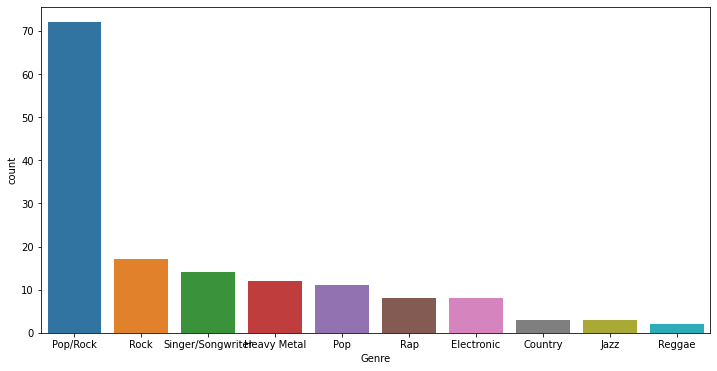

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['Genre'],order=df['Genre'].value_counts().index)
plt.show()

Nombre de musiques en fonction de leur genre et de leur set (train ou test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


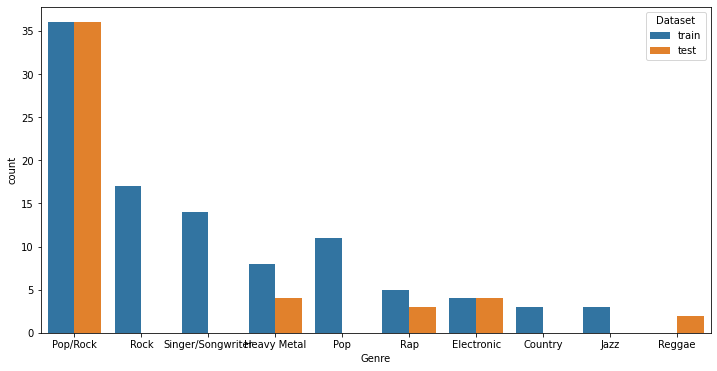

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(df['Genre'],order=df['Genre'].value_counts().index,hue=df["Dataset"])
plt.show()

Nombre de musiques en fonction de leur durée avec distribution

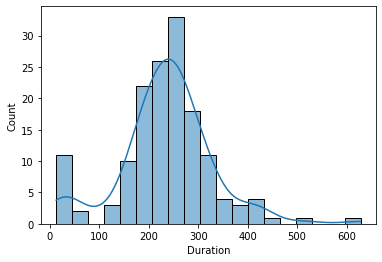

In [13]:
sns.histplot(df['Duration'],kde=True)
plt.show()

Nombre de musiques en fonction de leur durée et de leur set (train ou test)


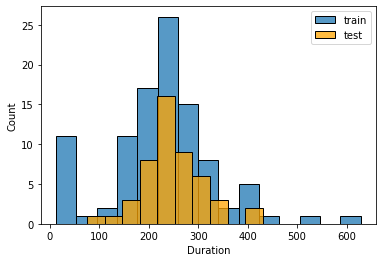

In [14]:
sns.histplot(df['Duration'][df["Dataset"]=="train"],label="train")
sns.histplot(df['Duration'][df["Dataset"]=="test"],label="test",color="orange")
plt.legend()
plt.show()

Affichage des 10 musique les plus courtes

In [15]:
df.sort_values(by="Duration").head(10)

Track name              Genre  ... Dataset Duration
90        Music Delta - Rock               Rock  ...   train     12.8
83    Music Delta - Country2            Country  ...   train     17.2
89      Music Delta - Reggae               Rock  ...   train     17.2
87     Music Delta - Hendrix               Rock  ...   train     19.6
91  Music Delta - Rockabilly               Rock  ...   train     25.7
88        Music Delta - Punk               Rock  ...   train     28.5
82    Music Delta - Country1            Country  ...   train     34.5
80     Music Delta - Beatles  Singer/Songwriter  ...   train     36.1
81     Music Delta - Britpop                Pop  ...   train     36.5
79    Music Delta - 80s Rock               Rock  ...   train     36.7

[10 rows x 6 columns]

Quelques stats sur l'échantillon de test

In [16]:
# seule la durée est numérique donc on ne voit qu'elle
df[df["Dataset"]=="test"].describe()

Duration
count   49.000000
mean   250.604082
std     62.732820
min     76.000000
25%    212.000000
50%    246.700000
75%    281.400000
max    430.100000

Quelques stats sur l'échantillon d'entrainement train

In [17]:
# seule la durée est numérique donc on ne voit qu'elle
df[df["Dataset"]=="train"].describe()

Duration
count  101.000000
mean   228.919802
std    106.457638
min     12.800000
25%    181.600000
50%    237.600000
75%    278.400000
max    628.300000

##Dataviz du musdb18 de Nussl (7 sec)

### Import/téléchargement des données


Imports

In [18]:
import nussl
from IPython.display import Audio
from IPython.display import display as AudioDisplay

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


Téléchargement de la base

In [19]:
# MUSDB18 est déjà dans le paquet nussl, 
# on s'appuie donc sur les fonctions de ce paquet

# création d'un paquet musdb avec 7s secondes de chaque musique de la base musdb18
# sera dans /root/.nussl/musdb18
musdb = nussl.datasets.MUSDB18(download=True)

# on importe ce paquet, on stocke (télécharge) dans mus on regarde le nombre de musiques
# root/MUSDB18/MUSDB18-7
# 144 dans nussl au lieu de 150 dans ce que DataScientest
# les 6 manquantes sont celles qui durent moins de 30 secondes et
# qui s'appellent ...Delta...
import musdb as musdb_package
mus = musdb_package.DB(download=True)
print('nombre de pistes lues',len(mus))

Done!
Done!
nombre de pistes lues 144


In [20]:
# on imprime les titres et numéros de musique dont le titre contient "elta"
print([(i,mus[i].name,"\n") for i in range(len(mus)) if ("elta" in mus[i].name)])
print(mus[70].name)
display(df[df["Track name"]==mus[59].name].shape)
display(df[df["Track name"]==mus[59].name].iloc[0,:])
display(df[df["Track name"]==mus[59].name].iloc[0,df.columns.get_loc('Dataset')])
if df[df["Track name"]==mus[59].name].iloc[0,df.columns.get_loc('Dataset')]=="train":
  print("train")
else:
  print("test")

[(54, 'Music Delta - 80s Rock', '\n'), (55, 'Music Delta - Beatles', '\n'), (56, 'Music Delta - Britpop', '\n'), (57, 'Music Delta - Country1', '\n'), (58, 'Music Delta - Disco', '\n'), (59, 'Music Delta - Gospel', '\n'), (60, 'Music Delta - Grunge', '\n')]
Skelpolu - Together Alone


(1, 6)

Track name    Music Delta - Gospel
Genre                          Pop
Source                    MedleyDB
License                CC BY-NC-SA
Dataset                      train
Duration                      75.5
Name: 85, dtype: object

'train'

train


###Sélection d'une musique i

In [21]:
# écoute des titres pour en sélectionner quelques uns
display_audio_mix = True
display_audio_sources = True
i = 54#59  #  stany : j'en choisis un avec une voix assez présente avec pas mal d'harmoniques


###Ecoute de i

Ecoute du mix

In [22]:
# la musique mélangée (mix)
if display_audio_mix:
  AudioDisplay(Audio(data=musdb[i]['mix'].audio_data, rate=musdb[i]['mix'].sample_rate))


Ecoute séparée

In [23]:
# la musique décomposée par source (drums, bass, others, vocals)
if display_audio_sources:
  for source,source_data in musdb[i]['sources'].items():
    print(source)
    AudioDisplay(Audio(data=source_data.audio_data, rate=source_data.sample_rate))

Output hidden; open in https://colab.research.google.com to view.

### Visualisation de i

####Signaux temporels

mix


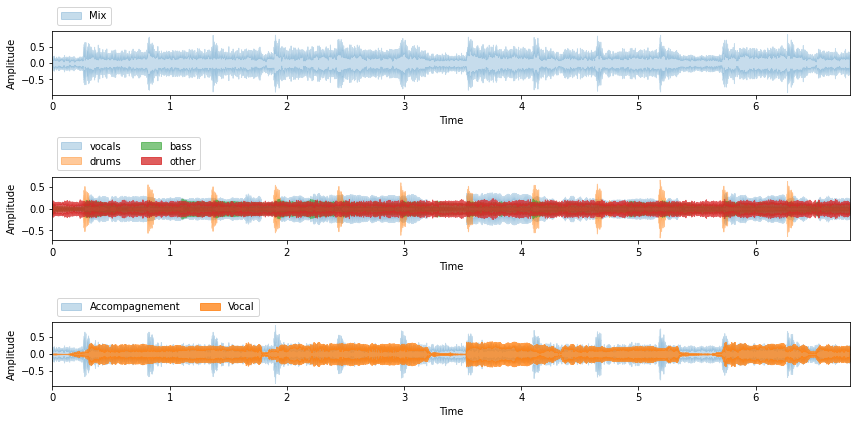

In [24]:
#Signal temporel du mix
print("mix")
plt.figure(figsize=(12,6))
plt.subplot(311)
nussl.core.utils.visualize_sources_as_waveform({"Mix": musdb[i]['mix']})

#Signaux temporels des 4 sources superposées
plt.subplot(312)
nussl.core.utils.visualize_sources_as_waveform(musdb[i]['sources'])

#Signaux temporels de la voix et de l'accompagnement superposés
plt.subplot(313)
nussl.core.utils.visualize_sources_as_waveform({"Vocal":musdb[i]['sources']["vocals"],"Accompagnement":musdb[i]['sources']["drums"]+musdb[i]['sources']["bass"]+musdb[i]['sources']["other"]})
plt.tight_layout()
plt.show()

####Spectogrammes

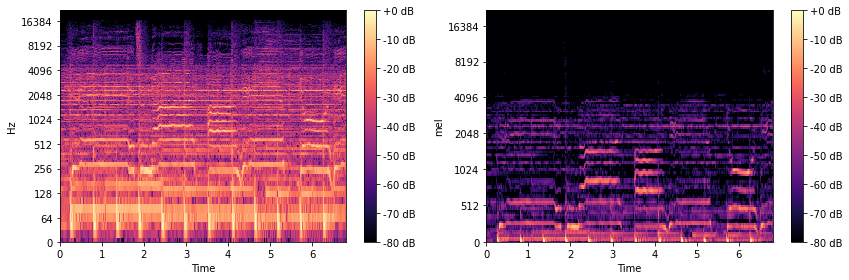

In [25]:
plt.figure(figsize=(12,4))

#Spectogramme du mix en fréquence
# stany : je mets en log pour être comparatif freq/mel et une légende en dB
plt.subplot(121)
nussl.core.utils.visualize_spectrogram(musdb[i]['mix'],y_axis='log')
plt.colorbar(format='%+2.0f dB')

#Spectogramme du mix en mel
plt.subplot(122)
nussl.core.utils.visualize_spectrogram(musdb[i]['mix'],y_axis="mel")
plt.colorbar(format='%+2.0f dB')
plt.ylabel("mel")
plt.tight_layout()
plt.show()

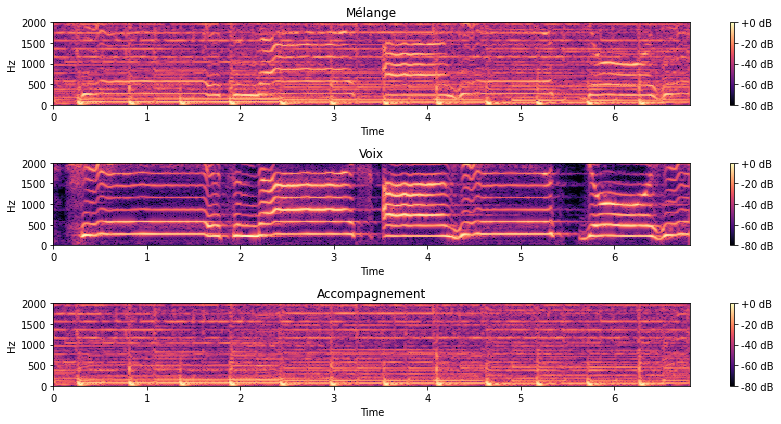

In [26]:
# stany : spectr total/voix/acc - zoom fréquence pour bien voir la voix
plt.figure(figsize=(12,6))
plt.subplot(311)
nussl.core.utils.visualize_spectrogram(musdb[i]['mix'],y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0,2000)
plt.ylabel("Hz")
plt.title('Mélange')

#Spectogramme du mix en fréquence, échelle linéaire
plt.subplot(312)
nussl.core.utils.visualize_spectrogram(musdb[i]['sources']["vocals"],y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0,2000)
plt.title('Voix')

#Spectogramme de l'accompagnement en fréquence, échelle linéaire
plt.subplot(313)
nussl.core.utils.visualize_spectrogram(musdb[i]['sources']["drums"]+musdb[i]['sources']["bass"]+musdb[i]['sources']["other"],y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.ylim(0,2000)
plt.title('Accompagnement')
plt.tight_layout()
plt.show()

####Transformées de Fourrier

Visualisation de la transformée de Fourrier du signal temporel du mix


{'path_to_input_file': 'Music Delta - 80s Rock', '_audio_data': array([[-9.71374512e-02, -1.10778809e-01, -8.18481445e-02, ...,
         3.05175781e-05, -2.13623047e-04, -1.83105469e-04],
       [-9.31091309e-02, -1.15692139e-01, -1.03485107e-01, ...,
        -1.19018555e-03, -1.92260742e-03, -2.34985352e-03]]), 'original_signal_length': 300032, '_stft_data': None, '_sample_rate': 44100, '_active_start': 0, '_active_end': 300032, 'label': None, '_stft_params': STFTParams(window_length=2048, hop_length=512, window_type='sqrt_hann'), '_effects_chain': [], '_effects_applied': []}


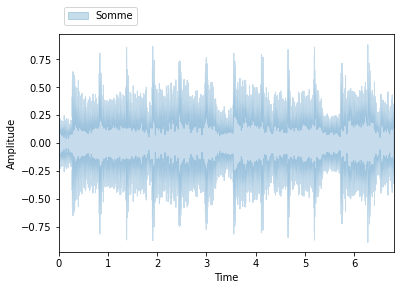

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  """


array([ 1.73123169+7.10542736e-15j, -2.22851812-4.17755998e+00j,
        5.93636246-3.59841951e-01j, ...,  0.00677663-2.85517850e+00j,
        5.93636246+3.59841951e-01j, -2.22851812+4.17755998e+00j])

In [27]:
from scipy import fft
print(musdb[i]["mix"].__dict__)
nussl.core.utils.visualize_sources_as_waveform({"Somme":musdb[i]["mix"]})
plt.show()
fft(musdb[i]["mix"]._audio_data[0][::10])

#### Voix ON/OFF


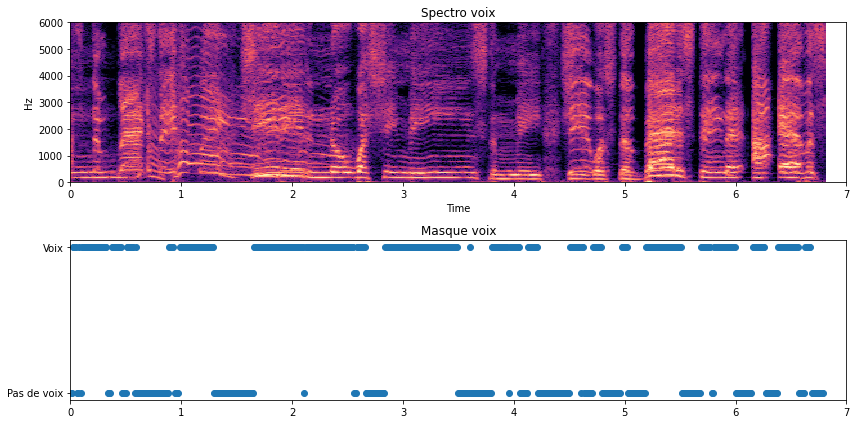

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


La musique  Angels In Amplifiers - I'm Alright  n'est pas dans la base train/test.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


Npiste (train/test) 55178 28763
Nhop= 587
Nfreq= 1025
Shape(train/test) (55178,) (28763,)


In [28]:
# paramètres de la STFT
window_length=2048
hop_length=512

# coupure en db (par rapport au max)
db_cutoff = -15. 

# plot?
plot=True

# target 
y_train=np.array([])
y_test=np.array([])

for i in range(len(musdb)):
  voice=musdb[i]['sources']["vocals"]

  voice.stft_params = nussl.STFTParams(window_length=window_length, hop_length=hop_length)

  stft = voice.stft()

  # niveau puissance en db (en relatif par rapport max.)
  psd = 10*np.log10(voice.power_spectrogram_data/voice.power_spectrogram_data.max())

  # je moyenne sur canaux et on chope le max dans toute la gamme fréquentielle
  psdmax = np.max( (psd[:,:,0]+psd[:,:,1])/2., axis=0)

  # puis masque basé sur cette valeur
  tmask = np.where(psdmax  < db_cutoff, 0., 1.)
  
  # temps morceau et taille dt (nhop) de la stft
  t = voice.audio_data.shape[1]/voice.sample_rate 
  nhop = tmask.shape[0]
  dt = t/nhop
  t = dt*np.arange(nhop) 

  # nfreq est le nombre de fréquences de la stft
  nfreq0 = psd.shape[0]

# on trace... 0= pas de voix
  if (plot) and i==2:
    AudioDisplay(Audio(data=musdb[i]['sources']["vocals"].audio_data, rate=musdb[i]['sources']["vocals"].sample_rate)) 
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    nussl.core.utils.visualize_spectrogram(voice,y_axis='linear')
    plt.title('Spectro voix')
    plt.ylim(0,6000)
    plt.xlim(0,7)
    plt.subplot(212)
    plt.title('Masque voix')
    plt.scatter(t,y=tmask)
    plt.xlim(0,7)
    plt.yticks([0,1],['Pas de voix', 'Voix'])
    plt.tight_layout()
    plt.show()

  # Prendre en compte le dossier train/test qu'on nous a fourni
  # on stocke à la suite toutes ces valeurs
  if mus[i].name in df["Track name"].to_list():
    if df[df["Track name"]==mus[i].name].iloc[0,df.columns.get_loc('Dataset')]=="train":
      y_train=np.append(y_train,tmask)  
    elif df[df["Track name"]==mus[i].name].iloc[0,df.columns.get_loc('Dataset')]=="test":
     y_test=np.append(y_test,tmask)
  else:
    print("La musique ",mus[i].name," n'est pas dans la base train/test.")


# ca y est
print('Npiste (train/test)',len(y_train),len(y_test))
print('Nhop=',nhop)
print('Nfreq=',nfreq0)
print('Shape(train/test)',y_train.shape,y_test.shape)